#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline


In [ ]:
#Loading data 
Loan = pd.read_csv("/content/TVS.csv")
Loan.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [ ]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,Rate of interest,Gender,Employment type,Resident type of customer,Date of birth,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [ ]:
#Checking the columns in the dataset
Loan_renamed.columns

Index(['Customer ID', 'Customer has bounced in first EMI',
       'No of times bounced 12 months', 'Maximum MOB',
       'No of times bounced while repaying the loan', 'EMI', 'Loan Amount',
       'Tenure',
       'Dealer codes from where customer has purchased the Two wheeler',
       'Product code of Two wheeler', 'No of advance EMI paid',
       'Rate of interest', 'Gender', 'Employment type',
       'Resident type of customer', 'Date of birth',
       'Customer age when loanwas taken', 'No of loans', 'No of secured loans',
       'No of unsecured loans', 'Max amount sanctioned in the Live loans',
       'No of new loans in last 3 months',
       'Total sanctioned amount in the secured Loans which are Live',
       'Total sanctioned amount in the unsecured Loans which are Live',
       'Maximum amount sanctioned for any Two wheeler loan',
       'Time since last Personal loan taken (in months)',
       'Time since first consumer durables loan taken (in months)',
       'No of times 

In [ ]:
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [ ]:
Loan_renamed.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,119528.000000,119528.000000,119528.000000,3.662600e+04,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,11.703803,37.003645,3.644385,2.247883,0.909720,2.742192e+05,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,3.980542,9.886047,6.989012,5.387067,2.476597,7.916241e+05,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000e+00,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,9.500000,29.000000,1.000000,1.000000,0.000000,4.190700e+04,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,12.600000,36.000000,1.000000,1.000000,0.000000,9.500000e+04,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,14.090000,45.000000,4.000000,2.000000,1.000000,3.000000e+05,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,20.650000,67.000000,555.000000,523.000000,54.000000,1.000000e+08,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


In [ ]:
#Removing irrelevant columns
#irrelevant_columns = ['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)']
Loan_renamed.drop(['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)'], axis = 1, inplace = True)
Loan_renamed.shape

(119528, 30)

<font color='yellow'>
Only use a heatmap if it is readable i.e There aren't too many values to correlate <br>
(isikuwe na vitu mob)<br>
and also if you have to use it better to annotate it with the correlation values<br>

</font>

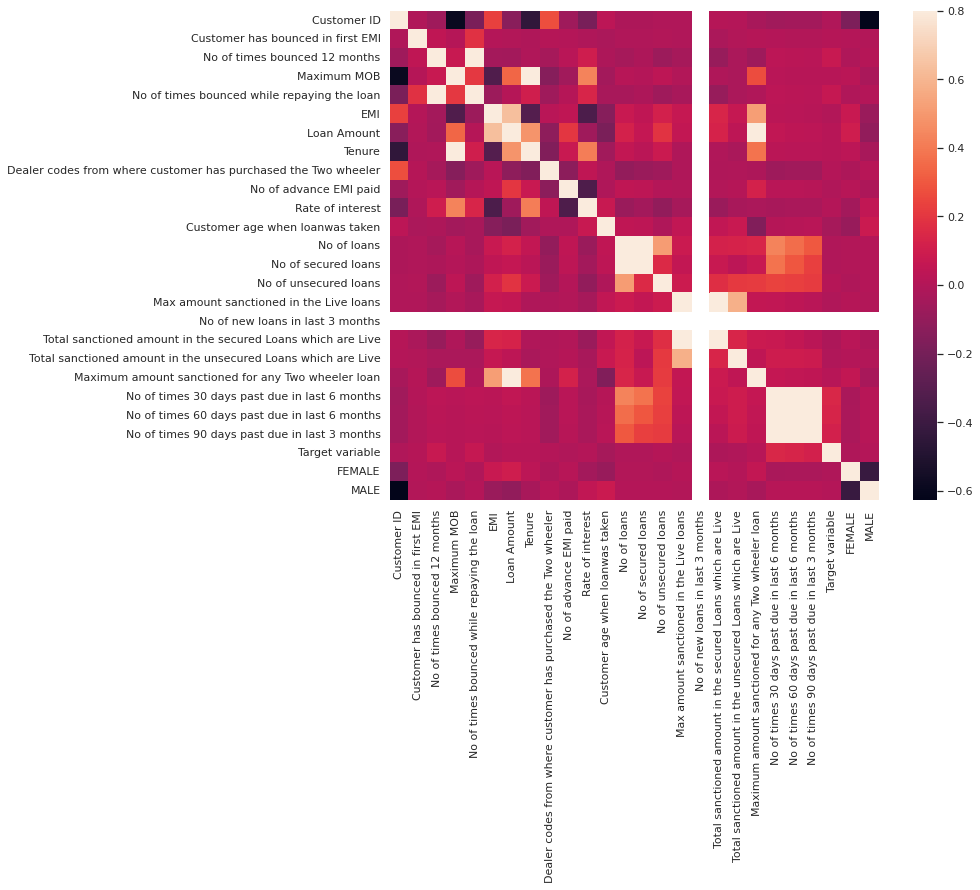

In [ ]:
#correlation matrix
corrmat = Loan_renamed.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Ratio of Male and female who took loan

Text(0.5, 1.0, 'Ratio of male and female who took loan')

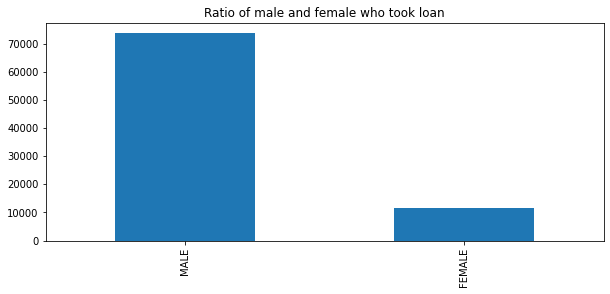

In [ ]:
Loan_renamed.Gender.value_counts().plot(kind = "bar", figsize = (10,4))
plt.title("Ratio of male and female who took loan")

#Loan amount

<font color='yellow'>For the three plots about LOAN AMOUNT, you could indicate why each is significant and what insights it gives that are different from the other or maybe what it adds on.</font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


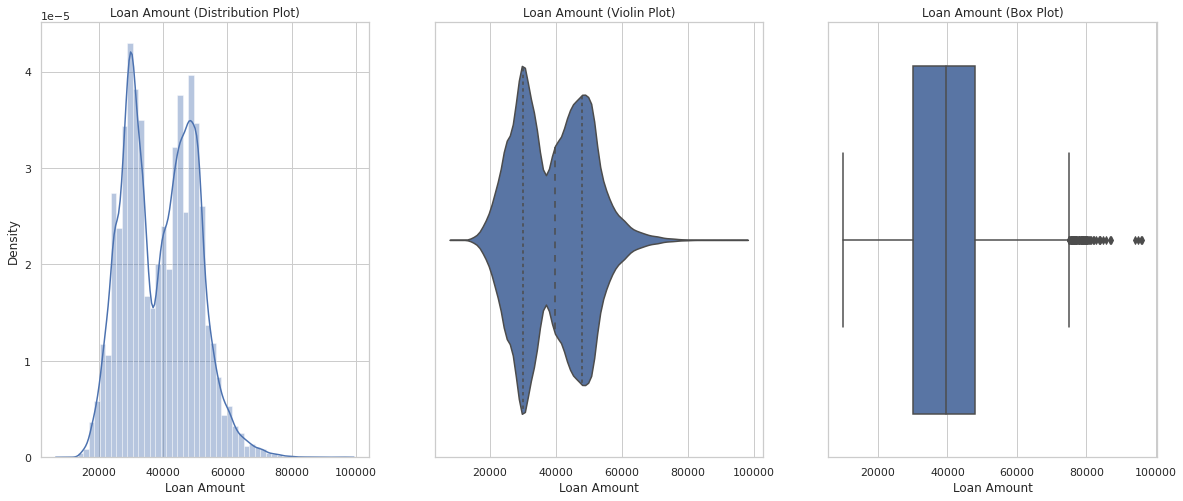

In [ ]:
sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.distplot(Loan_renamed['Loan Amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =Loan_renamed, x='Loan Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data =Loan_renamed, x='Loan Amount',ax=ax[2],orient='v')

###Age- age at which the client took the loan

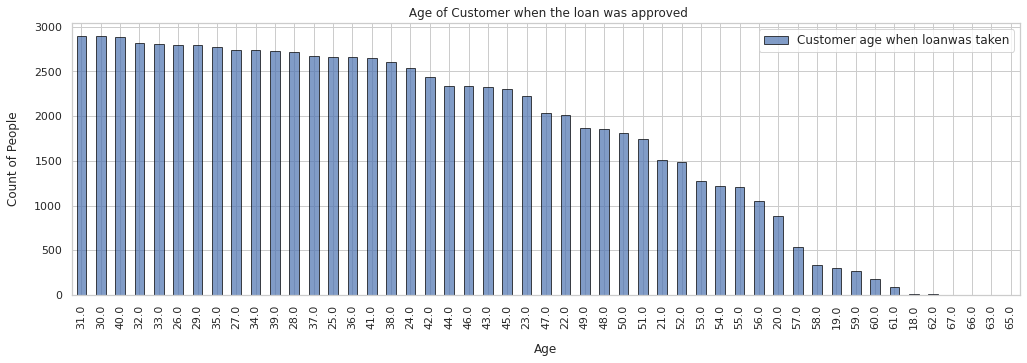

In [ ]:
plt.figure(figsize=(17,5))

#bar plot
Loan_renamed['Customer age when loanwas taken'].value_counts().plot(kind='bar',color='b',alpha=0.7, edgecolor='black')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

In [ ]:
x = Loan_renamed[['Customer ID', 'Customer has bounced in first EMI',
       'No of times bounced 12 months', 'Maximum MOB',
       'No of times bounced while repaying the loan', 'EMI', 'Loan Amount',
       'Tenure',
       'Dealer codes from where customer has purchased the Two wheeler',
       'Product code of Two wheeler', 'No of advance EMI paid',
       'Rate of interest', 'Gender', 'Employment type',
       'Resident type of customer', 'Date of birth',
       'Customer age when loanwas taken', 'No of loans', 'No of secured loans',
       'No of unsecured loans', 'Max amount sanctioned in the Live loans',
       'No of new loans in last 3 months',
       'Total sanctioned amount in the secured Loans which are Live',
       'Total sanctioned amount in the unsecured Loans which are Live',
       'Maximum amount sanctioned for any Two wheeler loan',
       'No of times 30 days past due in last 6 months',
       'No of times 60 days past due in last 6 months',
       'No of times 90 days past due in last 3 months', 'Tier',
       'Target variable']]
x[0:5]

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,Rate of interest,Gender,Employment type,Resident type of customer,Date of birth,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,0,0,0,TIER 1,0


In [ ]:
y = Loan_renamed["Target variable"]
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: Target variable, dtype: int64

Lets convert gender into categorical values

<font color = 'yellow'> Gender isn't the only categorical variable so you might have to explain why you ignored/left out the rest. <br>
Random forest will ignore any text data so all your categorical data that you did not transform from text to number will be ignored/will raise errors <br>
that is why you have this error <br></font>
<font color = 'red'>
ValueError : could not convert string to float: 'SC'
</font>

In [ ]:
gender = pd.get_dummies(Loan_renamed['Gender'])
Loan_renamed=pd.concat([Loan_renamed,gender], axis=1)
Loan_renamed = Loan_renamed.drop('Gender', axis=1)

In [ ]:
Loan_renamed.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,Rate of interest,Employment type,Resident type of customer,Date of birth,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable,FEMALE,MALE
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,0,0,0,TIER 1,0,1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,0,0,0,TIER 1,0,0,1
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,31,31,16,TIER 1,0,0,1
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,0,0,0,TIER 1,0,1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,0,0,0,TIER 1,0,0,1


#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (95622, 30) (95622,)
Test set: (23906, 30) (23906,)


#Classification

Random Forest Algorithmn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
RF = RandomForestClassifier().fit(X_train,y_train)
RF

ValueError: ignored

#Predicting

In [ ]:
yhat = RF.predict(X_test)

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))